# DIA Astral Module Testing and Visualization

This notebook tests the new DIA Astral protein-group quantification module and provides visualizations of the results.

In [1]:
# Check the current working directory
import os
import sys

print("📂 Current working directory:", os.getcwd())
print("📍 Notebook file location:", "/Users/locard/Documents/GitHub/ProteoBench/jupyter_notebooks/dev_tests/test_astral_module_notebook.ipynb")
print("🐍 Python executable:", sys.executable)
print("📁 ProteoBench root directory:", os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))

# List files in current directory to see what's here
print("\n📋 Files in current directory:")
for item in sorted(os.listdir(".")):
    print(f"  • {item}")

📂 Current working directory: /Users/locard/Documents/GitHub/ProteoBench/jupyter_notebooks/dev_tests
📍 Notebook file location: /Users/locard/Documents/GitHub/ProteoBench/jupyter_notebooks/dev_tests/test_astral_module_notebook.ipynb
🐍 Python executable: /Users/locard/anaconda3/envs/ProteoBench-jupyter/bin/python
📁 ProteoBench root directory: /Users/locard/Documents/GitHub

📋 Files in current directory:
  • test_astral_module_notebook.ipynb


In [2]:
#!/usr/bin/env python3
"""
Test script for the DIA Astral module with visualizations.
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("📦 Libraries imported successfully!")

📦 Libraries imported successfully!


## Import ProteoBench Module

Import the DIA Astral protein groups module and set up the configuration.

In [3]:
# Import your module
from proteobench.modules.quant.quant_lfq_proteingroup_DIA_Astral import DIAQuantProteingroupModuleAstral

print("🔧 ProteoBench modules imported successfully!")

🔧 ProteoBench modules imported successfully!


## Configuration

Set up the test parameters and file paths.

In [4]:
# Configuration
token = "dummy_token_for_testing"  # Replace with real token if needed

# Test data - replace these paths with your actual test files
input_file = "/Users/locard/Documents/Projets_en_cours/2022_ProteoBench/Dev/20260219_Module_PG/test_data_Robbe/diann_23._defaultpg_matrix_cleanHeaders.tsv"
input_format = "DIA-NN"

# Sample user input configuration -> FAKE VALUES, replace with actual user input as needed
user_input = {
    "software_name": "DIA-NN",
    "software_version": "1.0",
    "search_engine_version": "1.0", 
    "search_engine": "DIA-NN",
    "ident_fdr_peptide": 0.01,
    "ident_fdr_psm": 0.01,
    "ident_fdr_protein": 0.01,
    "enable_match_between_runs": 1,
    "enzyme": "Trypsin",
    "allowed_miscleavages": 2,
    "min_peptide_length": 6,
    "max_peptide_length": 40,
    "precursor_mass_tolerance": 20,
    "fragment_mass_tolerance": 20,
}

print("✅ Configuration set!")
print(f"📁 Input file: {input_file}")
print(f"🔧 Input format: {input_format}")

✅ Configuration set!
📁 Input file: /Users/locard/Documents/Projets_en_cours/2022_ProteoBench/Dev/20260219_Module_PG/test_data_Robbe/diann_23._defaultpg_matrix_cleanHeaders.tsv
🔧 Input format: DIA-NN


## Initialize Core Components (Git-Free Approach)

Since the full module requires Git repository access, we'll test the core functionality using individual components. This approach lets you:

- ✅ Test your DIA Astral processing pipeline  
- ✅ Validate input parsing and quantification
- ✅ Generate visualizations and metrics
- ❌ Skip Git repository operations (pull requests, data submission)

In [5]:
# Since the full module requires Git, let's use the core components independently

# Import the individual components we need
from proteobench.io.parsing.parse_proteingroup import load_input_file
from proteobench.io.parsing.parse_settings import ParseSettingsBuilder
from proteobench.score.quantscores import QuantScoresHYE
from proteobench.datapoint.quant_datapoint import QuantDatapointHYE

print("🚀 Core components imported successfully!")
print("📋 We can now test the functionality without Git dependencies")

🚀 Core components imported successfully!
📋 We can now test the functionality without Git dependencies


In [6]:
# Test the core functionality step by step (without Git)
try:
    print("🔄 Step 1: Loading input file...")
    input_df = load_input_file(input_file, input_format)
    print(f"✅ Input file loaded! Shape: {input_df.shape}")
    
    print("\n📊 First 3 rows (transposed for better readability):")
    display(input_df.head(3).T)  # Transpose to show columns as rows
    
    print("\n🔄 Step 2: Setting up parse settings...")
    # Import the constants to get the correct parse settings directory
    import os
    from proteobench.modules.constants import MODULE_SETTINGS_DIRS
    
    module_id = "quant_lfq_DIA_proteingroup_Astral"
    parse_settings_dir = MODULE_SETTINGS_DIRS[module_id]
    
    print(f"📂 Parse settings directory: {parse_settings_dir}")
    print(f"📂 Directory exists: {os.path.exists(parse_settings_dir)}")
    
    # Try to create parse settings
    parse_settings_builder = ParseSettingsBuilder(
        parse_settings_dir=parse_settings_dir,
        module_id=module_id
    )
    parse_settings = parse_settings_builder.build_parser(input_format)
    print("✅ Parse settings created!")
    
    print("\n🔄 Step 3: Converting to standard format...")
    standard_format, replicate_to_raw = parse_settings.convert_to_standard_format(input_df) 
    print(f"✅ Standard format created! Shape: {standard_format.shape}")
    ## Display the first few rows of the standard format
    print("\n📊 First 3 rows of standard format (transposed):")
    display(standard_format.head(3).T)  # Transpose to show columns as rows
    ## save the standard format to a temporary file to check it
    temp_standard_format_path = "temp_standard_format.tsv"
    standard_format.to_csv(temp_standard_format_path, sep="\t", index=False)
    print(f"✅ Standard format saved to {temp_standard_format_path}")

except Exception as e:
    print(f"❌ Workflow failed at some step: {e}")
    import traceback
    traceback.print_exc()

🔄 Step 1: Loading input file...
✅ Input file loaded! Shape: (11448, 12)

📊 First 3 rows (transposed for better readability):


,0,1,2
Protein.Group,sp|A0A024RBG1|NUD4B_HUMAN,sp|A0A096LP01|SIM26_HUMAN,sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN
Protein.Names,NUD4B_HUMAN,SIM26_HUMAN,GAL3A_HUMAN;GAL3B_HUMAN
Genes,NaN,NaN,NaN
First.Protein.Description,NaN,NaN,NaN
N.Sequences,5,4,10
N.Proteotypic.Sequences,1,4,0
LFQ_Astral_DIA_15min_50ng_Condition_A_REP1,5510000.0,303819.0,6480000.0
LFQ_Astral_DIA_15min_50ng_Condition_A_REP2,4700000.0,370917.0,6130000.0
LFQ_Astral_DIA_15min_50ng_Condition_A_REP3,4850000.0,324628.0,6310000.0
LFQ_Astral_DIA_15min_50ng_Condition_B_REP1,5670000.0,242392.0,6290000.0



🔄 Step 2: Setting up parse settings...
📂 Parse settings directory: /Users/locard/Documents/GitHub/ProteoBench/proteobench/io/parsing/io_parse_settings/Quant/lfq/DIA/proteingroup/Astral
📂 Directory exists: True
✅ Parse settings created!

🔄 Step 3: Converting to standard format...
✅ Standard format created! Shape: (64096, 20)

📊 First 3 rows of standard format (transposed):


,0,1,2
N.Proteotypic.Sequences,1,4,0
Protein.Names,NUD4B_HUMAN,SIM26_HUMAN,GAL3A_HUMAN;GAL3B_HUMAN
ECOLI,False,False,False
First.Protein.Description,NaN,NaN,NaN
MULTI_SPEC,False,False,False
Genes,NaN,NaN,NaN
contaminant,False,False,False
YEAST,False,False,False
N.Sequences,5,4,10
HUMAN,True,True,True


✅ Standard format saved to temp_standard_format.tsv


In [ ]:

try:
    
    print("\n🔄 Step 4: Computing quantification scores...")
    quant_score = QuantScoresHYE(
        "Proteins",  # feature_column_name for protein-group level
        parse_settings.species_expected_ratio(),
        parse_settings.species_dict()
    )
    intermediate_df = quant_score.generate_intermediate(standard_format, replicate_to_raw)
    print(f"✅ Quantification scores computed! Shape: {intermediate_df.shape}")
    ## Display the first few rows of the intermediate dataframe
    print("\n📊 First 3 rows of intermediate dataframe (transposed):")
    display(intermediate_df.head(3).T)  # Transpose to show columns as rows
    ## save the intermediate format to a temporary file to check it
    temp_intermediate_format_path = "temp_intermediate_format.tsv"
    intermediate_df.to_csv(temp_intermediate_format_path, sep="\t", index=False)
    print(f"✅ Intermediate format saved to {temp_intermediate_format_path}")

except Exception as e:
    print(f"❌ Workflow failed at some step: {e}")
    import traceback
    traceback.print_exc()


🔄 Step 4: Computing quantification scores...
✅ Quantification scores computed! Shape: (11344, 30)

📊 First 3 rows of intermediate dataframe (transposed):


,0,1,2
Proteins,sp|A0A024RBG1|NUD4B_HUMAN,sp|A0A096LP01|SIM26_HUMAN,sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN
log_Intensity_mean_A,22.255801,18.340672,22.588076
log_Intensity_mean_B,22.395585,18.137153,22.631773
log_Intensity_std_A,0.121488,0.146626,0.040065
log_Intensity_std_B,0.081632,0.310012,0.064722
Intensity_mean_A,5020000.0,333121.333333,6306666.666667
Intensity_mean_B,5523333.333333,292877.333333,6503333.333333
Intensity_std_A,430929.228528,34345.857601,175023.807904
Intensity_std_B,307462.734869,65307.639908,295014.123956
CV_A,0.085842,0.103103,0.027752


✅ Intermediate format saved to temp_intermediate_format.tsv



📊 First 3 rows of intermediate dataframe (transposed):


,0,1,2
Proteins,sp|A0A024RBG1|NUD4B_HUMAN,sp|A0A096LP01|SIM26_HUMAN,sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN
log_Intensity_mean_A,22.255801,18.340672,22.588076
log_Intensity_mean_B,22.395585,18.137153,22.631773
log_Intensity_std_A,0.121488,0.146626,0.040065
log_Intensity_std_B,0.081632,0.310012,0.064722
Intensity_mean_A,5020000.0,333121.333333,6306666.666667
Intensity_mean_B,5523333.333333,292877.333333,6503333.333333
Intensity_std_A,430929.228528,34345.857601,175023.807904
Intensity_std_B,307462.734869,65307.639908,295014.123956
CV_A,0.085842,0.103103,0.027752


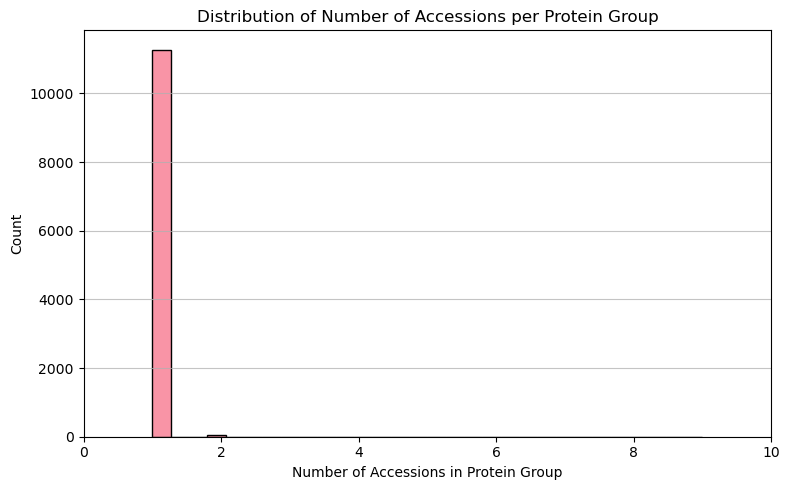

In [19]:
# Add protein-group specific metrics to the intermediate dataframe

## add the numnber of accession in the protein group ID field:
intermediate_df["Num_Accessions"] = intermediate_df["Proteins"].apply(lambda x: len(set(x.split(";"))) if pd.notnull(x) else 0)

print("\n📊 First 3 rows of intermediate dataframe (transposed):")
display(intermediate_df.head(3).T)  # Transpose to show columns as rows

## plot histogram of the number of accessions per protein group
plt.figure(figsize=(8, 5))
sns.histplot(intermediate_df["Num_Accessions"], bins=30, kde=False)
plt.title("Distribution of Number of Accessions per Protein Group")
plt.xlabel("Number of Accessions in Protein Group")
plt.ylabel("Count")
plt.xlim(0, intermediate_df["Num_Accessions"].max() + 1)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [13]:
try:
    
    print("\n🔄 Step 5: Generating datapoint...")
    current_datapoint = QuantDatapointHYE.generate_datapoint(
        intermediate_df, input_format, user_input, default_cutoff_min_feature=3
    )
    print("✅ Datapoint generated!")
    
    # Create a simple DataFrame for all_datapoints
    all_datapoints = pd.DataFrame([current_datapoint])
    
    print(f"\n🎉 Complete workflow successful!")
    print(f"📊 Intermediate dataframe shape: {intermediate_df.shape}")
    print(f"📈 All datapoints shape: {all_datapoints.shape}")
    print(f"📄 Input dataframe shape: {input_df.shape}")
    ## Display the first few rows of all_datapoints
    print("\n📊 First 3 rows of input_df (transposed)")
    display(input_df.head(3).T)  # Transpose to show columns as rows:
    ## Print all values in all_datapoints
    print("\n📊 all_datapoints")
    display(all_datapoints)
    
    # Save the results for inspection
    temp_all_datapoints_path = "temp_all_datapoints.csv"
    all_datapoints.to_csv(temp_all_datapoints_path, index=False)
    print(f"✅ All datapoints saved to {temp_all_datapoints_path}")
    # Set all datapoints to old
    all_datapoints["old_new"] = "old"
    
    temp_intermediate_format_path = "temp_intermediate_format.tsv"
    intermediate_df.to_csv(temp_intermediate_format_path, sep="\t", index=False)
    print(f"✅ Intermediate data saved to {temp_intermediate_format_path}")
    
except Exception as e:
    print(f"❌ Workflow failed at some step: {e}")
    import traceback
    traceback.print_exc()


🔄 Step 5: Generating datapoint...
✅ Datapoint generated!

🎉 Complete workflow successful!
📊 Intermediate dataframe shape: (11344, 30)
📈 All datapoints shape: (1, 29)
📄 Input dataframe shape: (11448, 12)

📊 First 3 rows of input_df (transposed)


,0,1,2
Proteins,sp|A0A024RBG1|NUD4B_HUMAN,sp|A0A096LP01|SIM26_HUMAN,sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN
Protein.Names,NUD4B_HUMAN,SIM26_HUMAN,GAL3A_HUMAN;GAL3B_HUMAN
Genes,NaN,NaN,NaN
First.Protein.Description,NaN,NaN,NaN
N.Sequences,5,4,10
N.Proteotypic.Sequences,1,4,0
LFQ_Astral_DIA_15min_50ng_Condition_A_REP1,5510000.0,303819.0,6480000.0
LFQ_Astral_DIA_15min_50ng_Condition_A_REP2,4700000.0,370917.0,6130000.0
LFQ_Astral_DIA_15min_50ng_Condition_A_REP3,4850000.0,324628.0,6310000.0
LFQ_Astral_DIA_15min_50ng_Condition_B_REP1,5670000.0,242392.0,6290000.0



📊 all_datapoints


,id,software_name,software_version,search_engine,search_engine_version,ident_fdr_psm,ident_fdr_peptide,ident_fdr_protein,enable_match_between_runs,precursor_mass_tolerance,...,mean_abs_epsilon_global,median_abs_epsilon_eq_species,mean_abs_epsilon_eq_species,median_abs_epsilon_precision_global,mean_abs_epsilon_precision_global,median_abs_epsilon_precision_eq_species,mean_abs_epsilon_precision_eq_species,nr_feature,comments,proteobench_version
0,DIA-NN_20260224_125647,DIA-NN,1.0,DIA-NN,1.0,0.01,0.01,0.01,1,20,...,0.206404,0.196349,0.313085,0.099134,0.193513,0.156831,0.265992,11029,,0.12.1.dev22+g34e6b1bd8


✅ All datapoints saved to temp_all_datapoints.csv
✅ Intermediate data saved to temp_intermediate_format.tsv


['sp|A0A024RBG1|NUD4B_HUMAN', 'sp|A0A096LP01|SIM26_HUMAN', 'sp|A0A0B4J2D5|GAL3B_HUMAN', 'sp|P0DPI2|GAL3A_HUMAN', 'sp|A0A0B4J2F0|PIOS1_HUMAN']

Number of unique accessions across all protein groups:
11433

Number of protein groups (rows):
11344


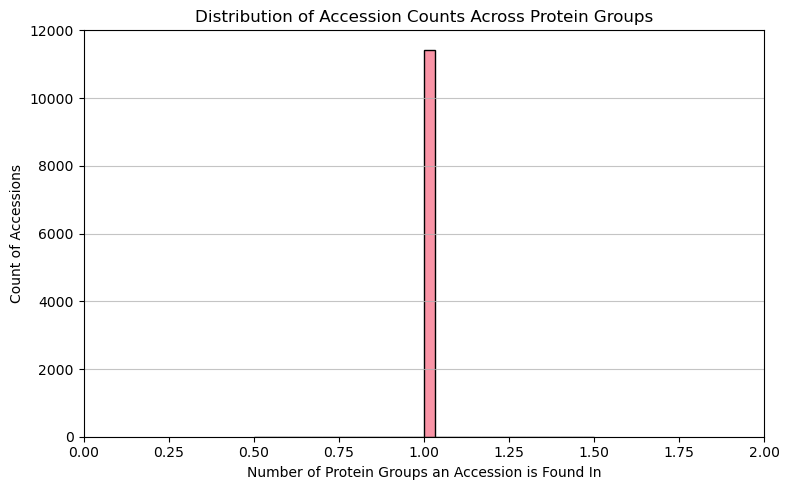

0

📊 all_datapoints


,id,software_name,software_version,search_engine,search_engine_version,ident_fdr_psm,ident_fdr_peptide,ident_fdr_protein,enable_match_between_runs,precursor_mass_tolerance,...,nr_feature,comments,proteobench_version,old_new,color,hover_text,scatter_size,Num_Unique_Single_Accessions,Num_accession_present_in_multiple_groups,Prop_accession_present_in_multiple_groups
0,DIA-NN_20260224_125647,DIA-NN,1.0,DIA-NN,1.0,0.01,0.01,0.01,1,20,...,11029,,0.12.1.dev22+g34e6b1bd8,old,#d42f2f,ProteoBench ID: DIA-NN_20260224_125647<br>Soft...,10,11433,0,0.0


In [47]:
# Add the number of unique single accessions in datapoint
unlist_accessions = intermediate_df["Proteins"].apply(lambda x: [acc for acc in x.split(";") if ";" not in acc] if pd.notnull(x) else [])
## concatenate all accessions into a single list to check for duplicates across protein groups
all_accessions = [acc for sublist in unlist_accessions for acc in sublist]
print(all_accessions[0:5])
print("\nNumber of unique accessions across all protein groups:")
print(len(set(all_accessions)))
print("\nNumber of protein groups (rows):")
print(len(intermediate_df["Proteins"]))

all_datapoints["Num_Unique_Single_Accessions"] = len(set(all_accessions))

# Add the number of unique single accessions that are present more than once (i.e. in multiple protein groups)
from collections import Counter
accession_counts = Counter(all_accessions)
acc_count_val = accession_counts.values()
## plot histogram of accession counts
plt.figure(figsize=(8, 5))
sns.histplot(list(accession_counts.values()), bins=30, kde=False)
plt.title("Distribution of Accession Counts Across Protein Groups")
plt.xlabel("Number of Protein Groups an Accession is Found In")
plt.ylabel("Count of Accessions")
plt.xlim(0, max(accession_counts.values()) + 1)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()
## return how many accessions are present in more than one protein group    
print(sum([count > 1 for count in acc_count_val]))

all_datapoints["Num_accession_present_in_multiple_groups"] = sum([count > 1 for count in acc_count_val])
all_datapoints["Prop_accession_present_in_multiple_groups"] = all_datapoints["Num_accession_present_in_multiple_groups"] / all_datapoints["Num_Unique_Single_Accessions"]
print("\n📊 all_datapoints")
display(all_datapoints)

# ProteoBench Plotting and Visualization

Now let's use ProteoBench's built-in plotting capabilities to create publication-ready visualizations!

## Import ProteoBench Plotting Modules

Let's import ProteoBench's specialized plotting functions for quantification analysis:

In [14]:
# Import ProteoBench's LFQHYEPlotGenerator
from proteobench.plotting.plot_generator_lfq_HYE import LFQHYEPlotGenerator

print("✅ LFQHYEPlotGenerator imported successfully!")

# Create an instance of the plot generator
plot_generator = LFQHYEPlotGenerator()
print("🎨 LFQHYEPlotGenerator instance created!")

# Display information about available plotting methods
print("\n📊 Available LFQHYEPlotGenerator methods:")
print("  • generate_in_depth_plots() - Create standard LFQ HYE plots")
print("  • plot_main_metric() - Generate main performance metric plot") 
print("  • get_in_depth_plot_layout() - Get plot layout configuration")
print("  • get_in_depth_plot_descriptions() - Get plot descriptions")

✅ LFQHYEPlotGenerator imported successfully!
🎨 LFQHYEPlotGenerator instance created!

📊 Available LFQHYEPlotGenerator methods:
  • generate_in_depth_plots() - Create standard LFQ HYE plots
  • plot_main_metric() - Generate main performance metric plot
  • get_in_depth_plot_layout() - Get plot layout configuration
  • get_in_depth_plot_descriptions() - Get plot descriptions


## 1. Main Quantification Plot

Create the primary ProteoBench quantification visualization:

In [15]:
# Create the main ProteoBench quantification plot using plot_main_metric
try:
    print("🎨 Generating main ProteoBench quantification plot...")
    
    # Since we don't have a complete module instance here, we'll create a mock one for testing
    # In real usage, you would get this from your module instance
    
    # Reload the module to pick up changes (needed when module classes are modified)
    import importlib
    import proteobench.modules.quant.quant_lfq_proteingroup_DIA_Astral
    importlib.reload(proteobench.modules.quant.quant_lfq_proteingroup_DIA_Astral)
    
    from proteobench.modules.quant.quant_lfq_proteingroup_DIA_Astral import DIAQuantProteingroupModuleAstral
    
    # Create a mock module to get the y_axis_title
    token = "dummy"  # We won't use GitHub features
    mock_module = DIAQuantProteingroupModuleAstral(token=token, use_github=False)
    
    # Check if y_axis_title exists, provide fallback
    y_axis_title = getattr(mock_module, 'y_axis_title', 
                          "Total number of protein groups quantified in the selected number of raw files")
    
    print(f"📌 Mock module y_axis_title: {y_axis_title}")
    
    # Generate the main metric plot using the module's y_axis_title
    fig_main = plot_generator.plot_main_metric(
        benchmark_metrics_df=all_datapoints,
        metric="Median",  # Can be "Median" or "Mean"
        label="None",     # Use "None" for no labels, or try "id" or "software_name" for column-based labels
        mode="Global",    # Can be "Global" or "Species-weighted" 
        annotation="Test Run",
        feature_column_name="nr_feature",
        y_axis_title=y_axis_title,  # Use the module's y_axis_title
    )
    
    # Display the plot
    fig_main.show()
    
    print("✅ Main ProteoBench quantification plot generated successfully!")
    print(f"📊 Y-axis title: {y_axis_title}")
    
    # You can also try different combinations:
    print("\n📊 Generating alternative versions...")
    
    # Mean with Species-weighted approach - using "id" for labels this time
    fig_mean = plot_generator.plot_main_metric(
        benchmark_metrics_df=all_datapoints,
        metric="Mean", 
        mode="Species-weighted",
        label="id",  # Use the "id" column for labels
        annotation="Alternative View",
        feature_column_name="nr_feature",
        y_axis_title=y_axis_title,  # Use the module's y_axis_title
    )
    fig_mean.show()
    
    print("✅ Alternative plots generated successfully!")
    
except Exception as e:
    print(f"❌ Error generating main metric plot: {e}")
    import traceback
    traceback.print_exc()

🎨 Generating main ProteoBench quantification plot...
📌 Mock module y_axis_title: Total number of protein groups quantified in the selected number of raw files


✅ Main ProteoBench quantification plot generated successfully!
📊 Y-axis title: Total number of protein groups quantified in the selected number of raw files

📊 Generating alternative versions...


✅ Alternative plots generated successfully!


## 2. In depth plots

In [16]:
# Generate the standard ProteoBench in-depth plots
try:
    print("🎨 Generating ProteoBench standard plots...")
    
    # Generate all the standard LFQ HYE plots
    plots = plot_generator.generate_in_depth_plots(
        performance_data=intermediate_df,
        parse_settings=parse_settings
    )
    
    print(f"✅ Generated {len(plots)} ProteoBench plots:")
    for plot_name in plots.keys():
        print(f"  • {plot_name}")
    
    # Display each plot
    plot_descriptions = plot_generator.get_in_depth_plot_descriptions()
    
    for plot_name, fig in plots.items():
        print(f"\n📊 {plot_name.upper()} PLOT:")
        print(f"📝 Description: {plot_descriptions.get(plot_name, 'No description available')}")
        
        # Show the plot
        fig.show()
    
    print("\n✅ All ProteoBench standard plots generated successfully!")
    
except Exception as e:
    print(f"❌ Error generating ProteoBench plots: {e}")
    import traceback
    traceback.print_exc()
    
    # Fallback to basic plotting if needed
    print("\n⚠️  Falling back to basic plotting...")
    
    # Create a simple fold change plot as fallback
    import plotly.express as px
    
    if 'log2_A_vs_B' in intermediate_df.columns and 'species' in intermediate_df.columns:
        fig = px.histogram(
            intermediate_df, 
            x='log2_A_vs_B', 
            color='species',
            title='Fold Change Distribution by Species',
            nbins=50,
            opacity=0.7
        )
        fig.update_layout(
            xaxis_title='Log2 Fold Change (A vs B)',
            yaxis_title='Count'
        )
        fig.show()
        print("✅ Basic fold change plot created as fallback!")

🎨 Generating ProteoBench standard plots...
✅ Generated 3 ProteoBench plots:
  • logfc
  • cv
  • ma_plot

📊 LOGFC PLOT:
📝 Description: log2 fold changes calculated from the performance data



📊 CV PLOT:
📝 Description: CVs calculated from the performance data



📊 MA_PLOT PLOT:
📝 Description: MA plot calculated from the performance data



✅ All ProteoBench standard plots generated successfully!
